# Final project

## Introduction

#### The Ising model

The Ising model is a simple model for simulating phase transitions. It contains a periodic, possibly infinite net of spins. Each spin can point upwards or downwards. These states are represented numerically as +1 and -1. The Hamiltonian of the model is:
$$H=-h\sum_{i}s_{i}-J\sum_{\left\langle i,j\right\rangle }s_{i}s_{j}$$
where $s_i$ denotes the $i$-th spin, $J$ is the coupling between spins, $h$ is proportional to the external field, and the angle brackets $\left\langle i,j\right\rangle$ mean that the summation runs over nearest neighbors. When $J>0$, the system behaves like a ferromagnetic material, since the spins tend to align to the same direction. When $J<0$, the system is like an antiferromagnetic material.

In our simulations we will set the external field to zero:
$$H=-J\sum_{\left\langle i,j\right\rangle }s_{i}s_{j}$$
Then the partition function of the system is
$$Z=\sum_{s\in C}\exp\left(\tilde\beta J\sum_{\left\langle i,j\right\rangle }s_{i}s_{j}\right)$$
where $C$ is the set of all spin configurations, and $\tilde\beta=1/(k_B T)$, $T$ is the temperature and $k_B$ is the Boltzmann constant. Since all quantities of interest can be expressed from the partition sum, we can see that these quantities only depend on the product of $\tilde\beta$ and $J$. Therefore it sufficient to set $J=1$, as we can express all measurement data from that:
$$Z(\tilde\beta,J)=Z(\tilde\beta J,1)$$

Our final partition function for the simulations is therefore:
$$Z=\sum_{s\in C}\exp\left(\tilde\beta \sum_{\left\langle i,j\right\rangle }s_{i}s_{j}\right)$$

#### Critical temperature, critical exponents

The system can exhibit phase transitions: at a certain temperature (called the critical temperature), quantities like the susceptibility diverge or have an abrupt jump. At low temperature, almost all spins point to the same direction, while at high temperature, they point randomly. Around the critical temperature large clusters appear in which spins point to the same direction. The critical exponents $\alpha, \beta, \gamma, \nu$ are defined as
$$T_r=\frac{T-T_{c}}{T_{c}}=\frac{\tilde\beta_c-\tilde\beta}{\tilde\beta}$$
$$c\sim T_r^{-\alpha}\qquad m\sim\left(-T_r\right)^{\beta}\qquad\chi\sim T_r^{-\gamma}\qquad\xi\sim T_r^{-\nu}$$
where $T_c, c, m, \chi, \xi$ are the critical temperature, specific heat, magnetization, susceptibility and correlation length, respectively.

#### Single site Markov-chain Monte-Carlo method, critical slowing down

The number of summands is huge: each new spin doubles the number of possible configurations. To tackle this problem, we will use importance sampling: a so-called Markov-chain Monte-Carlo process can yield random configurations, each with probability proportional to $\exp\left(-\beta H\right)$. A simple implementation flips one spin at a time.

This method is not efficient around the critical temperature: as large clusters appear, the probability to flip a site inside a cluster becomes small. Even if one spin is flipped, it could be flipped back before one of its neighbors is also flipped. The state is 'frozen', and the algorithm needs lots of iterations to produce a state that is not significantly correlated from the previous one. This phenomenon becomes stronger as we approach the critical temperature, based on a power law:
$$\tau\sim T_{r}^{-z\nu}$$
where $\tau$ is the correlation time of an arbitrary quantity. $z$ is called the dynamical exponent. If $z$ is smaller, it means the algorithm performs better near the critical temperature.

#### Wolff algorithm

Around the critical temperature there is a more efficient way to update spins: if we flip a spin, try to flip its neighbors too! This is the base of the Wolff algorithm. This way we have a bigger probability of flipping a cluster of identical spins than in the single-site case. The algorithm can produce statistically uncorrelated samples faster, thus reducing the effect of critical slowing down.

Both models are explained in the first sub-project.

## Project structure

Our solution is divided into smaller subprojects for easier comprehension. Each topic is in its own notebook. This notebook contains a short summary of the main results.

Speed-critical parts of the notebooks are implemented as Rust code. You can find the source code in the `final_project_native` folder. Pre-compiled binaries are not part of the repository. Instructions to compile the code can be found in the next section. The file `Ising_common_procedures.py` imports these methods from the compiled binary.

Simulation data is saved into the `simulation_data` folder. This way, each subproject can use the data obtained in other notebooks. If you want a clean start, you should delete this folder and run all the subprojects in the order they are listed below. However, the folder is populated by our measurement data by default, so no re-running of each simulation is necessary. We will clearly indicate if a cell would save data to the disk, so if you only want to re-run visualizations without overwriting data, you may execute all cells except those marked ones.

Generated images are saved to the `images` folder. These are easily reproducible from the current simulation data, therefore we will not mark cells which overwrite image data.

## Compiling the Rust code

The compilation and execution was done on Linux, to adapt to other operating systems, you should modify `Ising_common_procedures.py`.

To compile the Rust code, you will need to install [rustc and cargo](https://www.rust-lang.org/tools/install)). Then open a command line in the `final_project_native` folder and execute `cargo build --release`. It should create a folder called `target/release`, which contains the compiled shared library.

## List of subprojects

### [General visualizations](subproject-general-visualizations.ipynb)

This notebook presents the Ising model, the single-site Markov-chain Monte-Carlo (MCMC) and Wolff algorithms. Demonstrates general observations like cluster size in the Wolff algorithm based on the temperature, and its cutoff because of the finite grid.

### [Ergodicity and detailed balance in the Wolff algorithm](subproject-wolff-ergodicity-detailed-balance.ipynb)

For the Wolff algorithm to converge to the correct probability distribution, ergodicity and detailed balance are sufficient. Although these properties can be proved mathematically, here we demonstrate them also with simulations for small grid sizes.

### [Thermalization](subproject-thermalization.ipynb)

At the beginning Markov-chain Monte-Carlo methods are not independent from the starting state: if we sample before the system equalizes, we might get false results! Therefore we must measure first the thermalization time. Then, before we start any measurement, we will run the algorithm for an adequate time to reach the stationary distribution.

### [Comparison of single-site MCMC and Wolff model - results](subproject-mcmc-wolff-result-comparison.ipynb)

To make sure that we implemented the Wolff algorithm properly, here we compare some statistics obtained at different grid sizes and temperatures. Statistics include magnetization (and its mean absolute value) and energy per site.

### [Critical temperature from the Wolff model](subproject-wolff-measure-critical-temperature.ipynb)

Yet another check for our implementation could be recovering the analytically known critical temperature for the 2D Ising model. In this notebook we estimate the critical temperature for the 2D and 3D Ising models.

### [Comparison of the dynamical exponent of MCMC and Wolff algorithms](subproject-mcmc-wolff-speed-comparison.ipynb)

After these preparations, we are ready to demonstrate the usefulness of the Wolff algorithm: unlike the single site algorithm, which suffers from critical slowing down at the critical temperature, this algorithm can still produce fairly uncorrelated measurements. We derive the dynamical exponents for the 2D and 3D Ising model.

### [Wolff algorithm on triangular grid](subproject-triangular-grid.ipynb)

Finally we provide an outlook on the triangular grid. Our analysis includes the average shape of clusters, as well as comparison of measured properties with the square grid.

## Summary of main results

In [2]:
import numpy as np
import scipy.special
import scipy.stats
import matplotlib.pyplot as plt
import ctypes as ct
import ipywidgets as widgets
from numpy.ctypeslib import ndpointer

# Simulation helper methods

In [3]:
def init_grid(size):
    return np.random.choice(np.array([-1,1],dtype=np.int8),size)

def flip_grid_element(config):
    x = np.random.randint(0, len(config))
    y = np.random.randint(0, len(config))

    new_config = config.copy()
    new_config[x][y] *= -1

    return new_config

compiled_c_code = ct.CDLL("./final_project_native/target/release/libfinal_project_native.so")

ret32_1 = ct.c_int32()
ret32_2 = ct.c_int32()
retu32_1 = ct.c_uint32()

compiled_c_code.do_measure.argtypes = [ct.c_size_t,ct.c_size_t, ct.c_size_t,\
                        ndpointer(dtype=np.int8,flags=('C_CONTIGUOUS','ALIGNED','WRITEABLE')),\
                        ct.POINTER(ct.c_int32), ct.POINTER(ct.c_int32)]
compiled_c_code.do_measure.restype = ct.c_bool
# Returns the magnetic moment and energy for the given configuration
def measure(arr,j):
    if arr.ndim==2:
        assert compiled_c_code.do_measure(arr.shape[1],arr.shape[0],1,arr,ret32_1,ret32_2), "Rust panic! See cmd line."
    else:
        assert compiled_c_code.do_measure(arr.shape[2],arr.shape[1],arr.shape[0],arr,ret32_1,ret32_2), "Rust panic! See cmd line."
    return ret32_1.value, ret32_2.value*j

compiled_c_code.do_metropolis_hastings_sweep.argtypes = [ct.c_size_t,ct.c_size_t, ct.c_size_t,\
                        ndpointer(dtype=np.int8,flags=('C_CONTIGUOUS','ALIGNED','WRITEABLE')),\
                        ct.c_double, ct.c_int32]
compiled_c_code.do_metropolis_hastings_sweep.restype = ct.c_bool
# Executes n Metropolis-Hastings sweeps.
def metropolis_hastings_sweep(arr,j,n=1):
    if arr.ndim==2:
        assert compiled_c_code.do_metropolis_hastings_sweep(arr.shape[1],arr.shape[0],1,arr,j,n), "Rust panic! See cmd line."
    else:
        assert compiled_c_code.do_metropolis_hastings_sweep(arr.shape[2],arr.shape[1],arr.shape[0],arr,j,n), "Rust panic! See cmd line."

compiled_c_code.do_metropolis_hastings_measurement.argtypes = [ct.c_size_t,ct.c_size_t, ct.c_size_t,\
                        ndpointer(dtype=np.int8,flags=('C_CONTIGUOUS','ALIGNED','WRITEABLE')),\
                        ct.c_double, ct.c_int32, ct.POINTER(ct.c_uint32),\
                        ndpointer(dtype=np.float64,ndim=1,flags=('C_CONTIGUOUS','ALIGNED','WRITEABLE')),\
                        ndpointer(dtype=np.float64,ndim=1,flags=('C_CONTIGUOUS','ALIGNED','WRITEABLE'))]
compiled_c_code.do_metropolis_hastings_measurement.restype = ct.c_bool
# Executes as many Metropolis-Hastings sweeps as the length of the output arrays.
# Returns the total number of accepted flips.
# Fills the m_out and e_out arrays with the magnetic moment and energy values measured after each sweep.
def metropolis_hastings_measurement(config,j,m_out,e_out):
    assert m_out.size==e_out.size
    if arr.ndim==2:
        assert compiled_c_code.do_metropolis_hastings_measurement(arr.shape[1],arr.shape[0],1,arr,j,m_out.size,retu32_1,m_out,e_out), "Rust panic! See cmd line."
    else:
        assert compiled_c_code.do_metropolis_hastings_measurement(arr.shape[2],arr.shape[1],arr.shape[0],arr,j,m_out.size,retu32_1,m_out,e_out), "Rust panic! See cmd line."
    return retu32_1.value

compiled_c_code.do_wolff_step_at.argtypes = [ct.c_size_t,ct.c_size_t, ct.c_size_t,\
                        ndpointer(dtype=np.int8,flags=('C_CONTIGUOUS','ALIGNED','WRITEABLE')),\
                        ct.c_double, ct.c_double, ct.c_size_t, ct.c_size_t, ct.c_size_t, ct.POINTER(ct.c_int32)]
compiled_c_code.do_wolff_step_at.restype = ct.c_bool
# Executes a Wolff step on the array, with coupling j, and starting from (x,y,z)
# Requires a 2D/3D Numpy array of dtype=numpy.int8, each element +1 or -1.
# Returns the number of changed spins * the new sign of the cluster.
def wolff_step_at(arr,beta,j,x,y,z=0):
    if arr.ndim==2:
        assert compiled_c_code.do_wolff_step_at(arr.shape[1],arr.shape[0],1,arr,beta, j,x,y,z,ret32_1), "Rust panic! See cmd line."
    else:
        assert compiled_c_code.do_wolff_step_at(arr.shape[2],arr.shape[1],arr.shape[0],arr,beta,j,x,y,z,ret32_1), "Rust panic! See cmd line."
    return ret32_1.value

compiled_c_code.do_wolff_step.argtypes = [ct.c_size_t,ct.c_size_t, ct.c_size_t,\
                        ndpointer(dtype=np.int8,flags=('C_CONTIGUOUS','ALIGNED','WRITEABLE')),\
                        ct.c_double, ct.c_double, ct.c_int32]
compiled_c_code.do_wolff_step.restype = ct.c_bool
# Executes n Wolff steps on the array, with coupling j.
def wolff_step(arr,beta, j,n=1):
    if arr.ndim==2:
        assert compiled_c_code.do_wolff_step(arr.shape[1],arr.shape[0],1,arr,beta,j,n), "Rust panic! See cmd line."
    else:
        assert compiled_c_code.do_wolff_step(arr.shape[2],arr.shape[1],arr.shape[0],arr,beta,j,n), "Rust panic! See cmd line."
        
compiled_c_code.do_wolff_measurement.argtypes = [ct.c_size_t,ct.c_size_t, ct.c_size_t,\
                        ndpointer(dtype=np.int8,flags=('C_CONTIGUOUS','ALIGNED','WRITEABLE')),\
                        ct.c_double, ct.c_double, ct.c_int32,\
                        ndpointer(dtype=np.float64,ndim=1,flags=('C_CONTIGUOUS','ALIGNED','WRITEABLE')),\
                        ndpointer(dtype=np.float64,ndim=1,flags=('C_CONTIGUOUS','ALIGNED','WRITEABLE'))]
compiled_c_code.do_wolff_measurement.restype = ct.c_bool
# Executes as many Wolff steps on the array as the length of the output arrays.
# Fills the cluster_size_out and m_out arrays with the latest cluster size and
# magnetic moment measured after each sweep.
def wolff_measurement(config,beta,j,cluster_size_out,m_out):
    assert m_out.size==cluster_size_out.size
    if arr.ndim==2:
        assert compiled_c_code.do_wolff_measurement(arr.shape[1],arr.shape[0],1,arr,beta,j,m_out.size,cluster_size_out,m_out), "Rust panic! See cmd line."
    else:
        assert compiled_c_code.do_wolff_measurement(arr.shape[2],arr.shape[1],arr.shape[0],arr,beta,j,m_out.size,cluster_size_out,m_out), "Rust panic! See cmd line."
        
compiled_c_code.do_wolff_measurement_full.argtypes = [ct.c_size_t,ct.c_size_t, ct.c_size_t,\
                        ndpointer(dtype=np.int8,flags=('C_CONTIGUOUS','ALIGNED','WRITEABLE')),\
                        ct.c_double, ct.c_double, ct.c_int32,\
                        ndpointer(dtype=np.float64,ndim=1,flags=('C_CONTIGUOUS','ALIGNED','WRITEABLE')),\
                        ndpointer(dtype=np.float64,ndim=1,flags=('C_CONTIGUOUS','ALIGNED','WRITEABLE')),\
                        ndpointer(dtype=np.float64,ndim=1,flags=('C_CONTIGUOUS','ALIGNED','WRITEABLE'))]
compiled_c_code.do_wolff_measurement_full.restype = ct.c_bool
# Executes as many Wolff steps on the array as the length of the output arrays.
# Fills the cluster_size_out, m_out and e_out arrays with the latest cluster size,
# magnetic moment and energy measured after each sweep.
def wolff_measurement_full(config,beta,j,cluster_size_out,m_out,e_out):
    assert m_out.size==cluster_size_out.size
    assert e_out.size==cluster_size_out.size
    if arr.ndim==2:
        assert compiled_c_code.do_wolff_measurement_full(arr.shape[1],arr.shape[0],1,arr,beta,j,m_out.size,cluster_size_out,m_out,e_out), "Rust panic! See cmd line."
    else:
        assert compiled_c_code.do_wolff_measurement_full(arr.shape[2],arr.shape[1],arr.shape[0],arr,beta,j,m_out.size,cluster_size_out,m_out,e_out), "Rust panic! See cmd line."

## Exact functions for the 2D infinite Ising grid

In [11]:
# critical coupling
j_c=np.log(1+np.sqrt(2))/2
# exact mean absolute magnetization
def exactMeanAbsoluteM(j):
    if (j_c>=j):
        return 0
    else:
        return (1-1/np.sinh(2*j)**4)**(1/8)
# exact mean energy per site
def exactAverageE(j):
    tanh=np.tanh(2*j)
    cosh=np.cosh(2*j)
    return -j/tanh*(1+2/np.pi*(2*tanh*tanh-1)*scipy.special.ellipk(4*tanh*tanh/cosh/cosh))
j_c

0.44068679350977147

In [5]:
def Gamma(array,t):
    t=abs(t)
    avg=np.average(array)
    s=0
    for i in range(len(array)-t):
        s+=(array[i]-avg)*(array[i+t]-avg)
    s/=(len(array)-t)
    return s

# returns the normalized autocorrelation function for all
# indices in ´values´
def GammaNormalized(array,values):
    gamma0 = Gamma(array,0)
    return [Gamma(array,t)/gamma0 for t in values]

# Clustersize against different Temperatures

In [125]:
def wolff_csize_vs_temp(gsize, beta_range, J, nwarmup=1000, nmeas=1000, save=False, plot=True):
    from tqdm import tqdm

    c_result = np.zeros(nmeas)
    m_result = np.zeros(nmeas)

    fig, ax = plt.subplots(figsize=(7,7))

    res = []
    
    for beta in tqdm(beta_range):
        grid = init_grid((gsize,gsize))

        wolff_step(grid, beta, J, nwarmup)
        
        wolff_measurement(grid, beta, J, c_result, m_result)

        res += [np.average(c_result)]


    ax.plot(beta_range, np.array(res), 'X')

    ax.set_xlabel(r'$\beta$', fontsize=18)
    ax.set_ylabel('avg. cluster size',fontsize=18)
    ax.set_title(f'Average cluster size against temperature\n$J={J}$, #warmup={nwarmup}, #measurement={nmeas}')
    ax.grid()

100%|██████████| 200/200 [00:19<00:00, 10.25it/s]


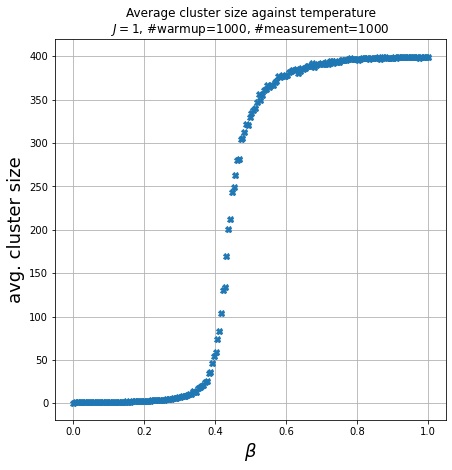

In [128]:
wolff_csize_vs_temp(50, np.linspace(0, 1, 200), J=1)

In [51]:
def wolff_csize_visually(gsize, beta_range, J=1, nwarmup=1000, nmeas=1000):
    from tqdm import tqdm
    
    fig = plt.figure(figsize=(9,9))
    fig.subplots_adjust(hspace=0.4, wspace=0)

    c_result = np.zeros(nmeas)
    m_result = np.zeros(nmeas)
    
    for i, beta in enumerate(tqdm(beta_range)):
        grid = init_grid((gsize,gsize))

        wolff_step(grid, beta, J, nwarmup)
        
        wolff_measurement(grid, beta, J, c_result, m_result)

        ax = fig.add_subplot(4, 2, i+1)
        ax.imshow(grid,vmin=-1,vmax=1)
        ax.set_title(r'$\beta=%.2f$' % beta)


    #         ax.plot(1/beta_range, np.array(res), 'X')

    #         ax.set_xlabel(r'$T$', fontsize=18)
    #         ax.set_ylabel('avg. cluster size',fontsize=18)
    #         ax.set_title(f'Average cluster size against temperature\n$J={J}$, #warmup={nwarmup}, #measurement={nmeas}')
    # ax.grid()

In [52]:
wolff_csize_visually(51, [0, 0.1, 0.3, 0.4, 0.5, 0.6, 1, 3], nwarmup=5000, nmeas=5000)

  0%|          | 0/8 [00:00<?, ?it/s]


NameError: name 'arr' is not defined

<Figure size 648x648 with 0 Axes>

# Ergodicity test

In [22]:
def wolff_iter_till_equal(C1, C2, beta=0.2, J=1):
    equal = False
    niter = 0
        
    while not equal:
        C1_ = C1.copy()
        
        wolff_step(C1_, beta, J, 1)

        if np.array_equal(C1_, C2):
            equal = True

        niter += 1

    return niter

In [5]:
def ergodicity(gsizes, beta=0.1, J=1):
    from tqdm import tqdm

    fig, ax = plt.subplots(figsize=(8,8))

    niters = []
    
    for gsize in tqdm(gsizes):
        C1 = init_grid((gsize,gsize))
        C2 = flip_grid_element(C1)

        niters += [wolff_iter_till_equal(C1, C2, beta, J)]

    ax.plot(np.array(gsizes), np.array(niters), 'o')

    ax.set_xticks(gsizes)
    ax.set_xlabel('grid size', fontsize=18)
    ax.set_ylabel('number of iterations',fontsize=18)
    ax.set_title('Number of iterations before reaching initial spin configuration\n' + r'$\beta=%.2f$ $J=%d$' % (beta, J))
    ax.grid()

100%|██████████| 3/3 [00:00<00:00,  5.85it/s]


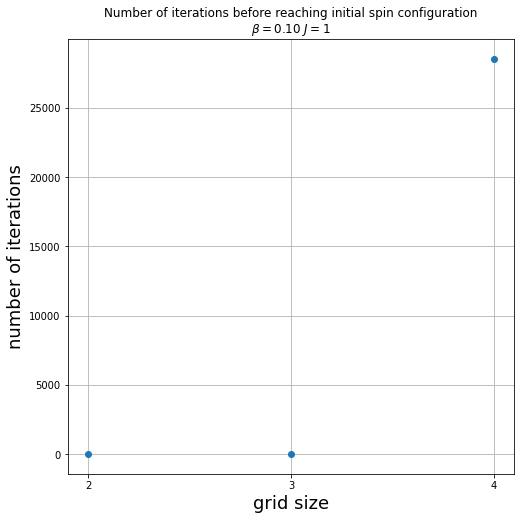

In [130]:
ergodicity(range(2, 5), beta=0.1)

# Test for detailed balance

In [138]:
def detailed_balance(C1,C2, nmeas, beta=0, J=1):
    from tqdm import trange
    
    res1 = []
    res2 = []

    for gsize in [0]:
        m_result_1, e_result_1 = measure(C1, 1*beta)
        m_result_2, e_result_2 = measure(C2, 1*beta)
        
        #deltaS = np.exp(-(e_result_1-e_result_2))
        
        deltaS = np.exp(e_result_2-e_result_1)
        
        niters1_sum, niters2_sum = 0,0

        for meas in range(nmeas):
            niters1_sum += wolff_iter_till_equal(C1.copy(), C2.copy(), beta, J)
            niters2_sum += wolff_iter_till_equal(C2.copy(), C1.copy(), beta, J)

        print(f'deltaS={deltaS}, avg. niters={niters1_sum/niters2_sum}')

        # res1 += [np.average(niters1)]
        # res2 += [np.average(niters2)]

    # rects1 = ax.bar(x - width/2, res1, width, label=f'C1 -> C2')
    # rects2 = ax.bar(x + width/2, res2, width, label=f'C2 -> C1')

    # for rects in [rects1, rects2]:
    #     for rect in rects:
    #         height = rect.get_height()
    #         ax.annotate('{}'.format(height),
    #                     xy=(rect.get_x() + rect.get_width() / 2, height),
    #                     xytext=(0, 3),  # 3 points vertical offset
    #                     textcoords="offset points",
    #                     ha='center', va='bottom')


    # ax.set_xlabel('grid size')
    # ax.set_ylabel('Iterations')
    # ax.set_title('Number of iterations (detailed balance)\n' + r'$\beta=%.2f$ $J=%d$' % (beta, J))
    # ax.set_xticks(x)
    # ax.set_xticklabels(gsizes)
    # ax.legend()
    # fig.tight_layout()

In [140]:
C1 = init_grid((3,3))
C2 = C1.copy()
wolff_step(C2, 0.1, 1, 1)
detailed_balance(C1,C2, 10000, beta=0.1)

deltaS=0.6703200460356392, avg. niters=0.6619110976716057


In [63]:
print(C1)
print(C2)

[[-1  1 -1]
 [-1 -1  1]
 [ 1  1  1]]
[[-1 -1 -1]
 [-1 -1  1]
 [ 1  1  1]]


In [64]:
2.0827026518159584**2

4.337650335881225

# Autocorrelation time

In [123]:
def ising_2d_critical_temp_exact(J=1): #onsager exact solution
    return J/2*np.log((1+np.sqrt(2)))

In [124]:
ising_2d_critical_temp_exact()

0.44068679350977147

In [59]:
def acorr(j,beta,L,warm,meas):
    arr=init_grid((L,L))
    wolff_step(arr,beta,j,warm)
    acc=np.zeros((1,51))
    for i in range(0,meas):
        wolff_step(arr,beta,j,1)
        if arr[0,0]>0:
            acc+=arr[:,0]
        else:
            acc-=arr[:,0]
    return list(np.log(acc[0,:]/meas).flat)

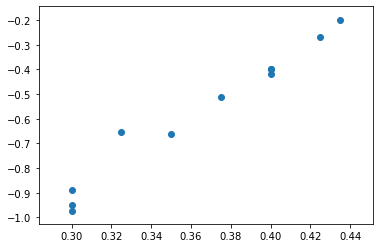

In [116]:
toplot_beta+=[beta]
toplot_sl+=[sl]
plt.scatter(toplot_beta,toplot_sl)

-0.19867576455021754

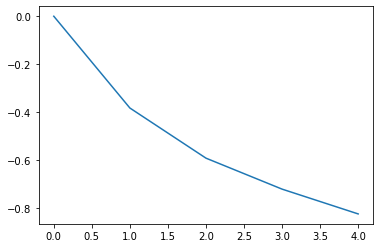

In [115]:
beta=0.435
result=acorr(1,beta,51,10000,1000000)[:5]
plt.plot(result)
sl=scipy.stats.linregress(list(range(5)),result).slope
sl

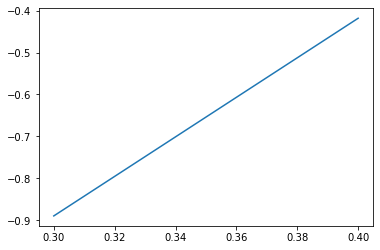

In [98]:
plt.plot(toplot_beta,toplot_sl)

In [83]:
list(range(5))

[0, 1, 2, 3, 4]

In [97]:
toplot_beta=[toplot[0],toplot[2]]
toplot_sl=[toplot[1],toplot[3]]